# AUDIO ENCRYPTION AND DECRYPTION USING CHAOTIC MAP

#### DONE BY

##### Sambit Sanyal & Vishakha Bhat


## For best results run this on Google Colab

In [1]:
print("Setting Parameters")
inputfilename='good-morning.wav'


path="/content/"+inputfilename #Path to the audio file
big_num=20000                  #Number of keys generated, The bigger the number the bigger the chaos but at the same time the longer the key generation





print("Parameters set")

Setting Parameters
Parameters set


In [2]:
from IPython.display import clear_output
print("This is a git repo to play audio files in Google colab\n Don't run the below block until this is done\n\n")
!git clone https://github.com/AllenDowney/ThinkDSP.git 
clear_output(wait=True)
print("Done!\nNow you can play audios in Google Colab")

Done!
Now you can play audios in Google Colab


### STEP 1 : Importing of libraries

In [3]:
print("Importing Libraries")

# To chain the final binary keys
import itertools

#To read and write to audio(.wav) files:
import wave

# For Spectogram generation
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks

#To clear unnecessary output 
from IPython.display import clear_output

#To get spectogram wave form generation 
import numpy
import matplotlib.pyplot as plt
import pylab
from scipy.io import wavfile
from scipy.fftpack import fft

# To play audio files in google colab
import sys
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython

def printlst (lst) :
  print('[',lst[0],lst[1],lst[2],lst[3],lst[4],lst[5],'......',len(lst),"items ]")

#For Cross-Correlation

import pandas as pd
import seaborn as sns



print("All libraries imported!")

Importing Libraries
All libraries imported!


### STEP 2 : Key generation using chaotic map

In [4]:
print("Key generation starts")


def keygen(x,r,size):
  key=[]
  for i in range(size):
    x=r*x*(1-x)
    key.append(((x*pow(10,16))%256.126))
  return key
print("Key generated:")
printlst(keygen(0.0123,3.9159,big_num)) #values could be changed accordingly

Key generation starts
Key generated:
[ 245.7084219499086 173.52781167185526 106.22965462235584 135.55734787549773 129.83433193306382 241.83943323140556 ...... 20000 items ]


In [5]:
#<----RUN ONLY ONCE PER SESSION! DO NOT KEEP RE-RUNNING


print("Generating Deck keys using chaotic map")
deckey=[]
for i in range(big_num):
  deckey.append(keygen(0.0123,3.9159,big_num)[i] -int(keygen(0.0123,3.9159,big_num)[i]))
  print(i+1, "keys generated")
#print(deckey)
clear_output(wait=True)
print(i+1, "keys generated")
print("Deck keys generated using chaotic map")
printlst(deckey)

20000 keys generated
Deck keys generated using chaotic map
[ 0.7084219499085975 0.527811671855261 0.229654622355838 0.5573478754977259 0.8343319330638224 0.8394332314055646 ...... 20000 items ]


In [6]:
print("Generating final keys from deck key")
finkey=[]
for i in range(big_num):
  finkey.append(int(str(deckey[i])[-3:]))
#finkey.append(int(str(deckey[-3:])))
print("Final key generted:")
printlst(finkey)

Generating final keys from deck key
Final key generted:
[ 975 261 838 259 224 646 ...... 20000 items ]


In [7]:
print("Generating binary keys from final keys")
binkey=[]
for i in range(big_num):
  binkey.append(bin(finkey[i]))
print("Binary key generated:")
printlst(binkey)

Generating binary keys from final keys
Binary key generated:
[ 0b1111001111 0b100000101 0b1101000110 0b100000011 0b11100000 0b1010000110 ...... 20000 items ]


In [8]:
print("Splitting binary keys on the \'b\' ")
binkey_fin=[]
import re
for i in range(big_num):
  binkey_fin.append(re.findall(r'\d+', binkey[i]))
print("Now we have a list of lists:")
printlst(binkey_fin)

Splitting binary keys on the 'b' 
Now we have a list of lists:
[ ['0', '1111001111'] ['0', '100000101'] ['0', '1101000110'] ['0', '100000011'] ['0', '11100000'] ['0', '1010000110'] ...... 20000 items ]


In [9]:
#import itertools
print("Converting list of lists into one list")
merged = list(itertools.chain(*binkey_fin))
print('The merged list is:')
printlst(merged)

Converting list of lists into one list
The merged list is:
[ 0 1111001111 0 100000101 0 1101000110 ...... 40000 items ]


In [10]:
print("Deleting the alternate zero values")
del merged[0::2]
print("After removing non zero values we have")
printlst(merged)

Deleting the alternate zero values
After removing non zero values we have
[ 1111001111 100000101 1101000110 100000011 11100000 1010000110 ...... 20000 items ]


In [11]:
print("Converting string to integer:")

mergedfinal = list(map(int, merged))
printlst(mergedfinal)

Converting string to integer:
[ 1111001111 100000101 1101000110 100000011 11100000 1010000110 ...... 20000 items ]


### STEP 3 : Extracting Data from Input Audio File

In [12]:
print("Extract from input audio file")
print(path)
#import wave

w = wave.open(path, 'r')

channels=w.getnchannels()
print("Number of channels",channels)


framerate=w.getframerate()
print("FrameRate:",framerate)


sampwidth=w.getsampwidth()
print("Sample Width:",sampwidth)


framerate=w.getframerate()
print("FrameRate:",framerate)




print("\nNumber of Frames: ", w.getnframes())
frameslst=[]
for i in range(w.getnframes()):
  frame=w.readframes(1)
  frameslst.append(frame)
  #print(frame)

print("The frames are")
printlst(frameslst)


Extract from input audio file
/content/good-morning.wav
Number of channels 2
FrameRate: 48000
Sample Width: 2
FrameRate: 48000

Number of Frames:  124992
The frames are
[ b'\xfd\xff\xfb\xff' b'\xf8\xff\xf8\xff' b'\xf7\xff\xf3\xff' b'\xf8\xff\xf6\xff' b'\xf7\xff\xf5\xff' b'\xf4\xff\xf3\xff' ...... 124992 items ]


In [13]:
print("\nNow converting them into integers\n")
intframe=[]
for frame in frameslst :
  int_val = int.from_bytes(frame, "big")
  intframe.append(int_val)
  #print(int_val)

print("The integer frames are:\n")
printlst(intframe)


Now converting them into integers

The integer frames are:

[ 4261411839 4177524991 4160746495 4177524479 4160747007 4110414847 ...... 124992 items ]


In [14]:
keysize = len(mergedfinal)
print("The number of key values we have generated :",keysize)

print("The number of byte frames we have :",len(intframe))




The number of key values we have generated : 20000
The number of byte frames we have : 124992


### STEP 4 : XOR Encryption

In [15]:
print("XOR - ENCRYPTION") 

xor_result=[]

for i in range(len(intframe)):
  xor=intframe[i]^mergedfinal[i%keysize] # m mod n returns a value only from 0 to n , no matter how large m is 
  xor_result.append(xor)

print("The XOR result is:")
printlst(xor_result)





XOR - ENCRYPTION
The XOR result is:
[ 3217519592 4245297562 3059752529 4245297140 4149652127 3368850193 ...... 124992 items ]


In [16]:
#Convert XOR Result to bytearray

check=[]
print("Now converting XOR values into frames:")
for num in xor_result:
  bytes_val = num.to_bytes(4, 'big')
  #print(bytes_val)
  check.append(bytes_val)
check.reverse()
print("\nBytes list\n")
printlst(check)

Now converting XOR values into frames:

Bytes list

[ b'\x04B\xf0\xb8' b'9\x9f\x06\xb7' b'=\xa9\x1d\xc4' b'9\x0f\x7fJ' b'8\x01\x8b\xa2' b'9\x8f\xc1+' ...... 124992 items ]


### STEP 5: Writing to an Encrypted Audio File

In [17]:
#code to convert bytearray to wav audio file

print("Now writing the encypted values to an audio file")
filename='encrypted-'+inputfilename

 
writer=wave.open('/content/'+filename,'wb')

writer.setnchannels(channels)
writer.setsampwidth(sampwidth)
writer.setframerate(framerate)
writer.setnframes(1)
for frame in check:
 writer.writeframesraw(frame)
writer.close()

print("Written to file ", filename)

Now writing the encypted values to an audio file
Written to file  encrypted-good-morning.wav


In [18]:
print("Now we can analyse the encrypted file!")

print("We write to sound.wav and play it.\n Run this code again before playing\n\n")
sin = thinkdsp.SinSignal(freq=400, amp=0.5) # Where freq is the frequency and amp is the amplitude of the sine wave
waver = sin.make_wave(duration=2, start=0, framerate=44100) # Turn the sin wave into an audio wave
waver.play()
IPython.display.Audio('encrypted-'+inputfilename) # This is required on Google Colab due to compatibility issues

Now we can analyse the encrypted file!
We write to sound.wav and play it.
 Run this code again before playing


Writing sound.wav


### STEP 6 : Decryption and retrieval of audio file

In [19]:
#DECRYPTION
print("Now we shall decrypt the encrypted values using XOR")
orig=[]
#print("The integer frames are:")
#print(intframe)

for i in range(len(xor_result)):
  xor=xor_result[i]^mergedfinal[i%keysize]
  orig.append(xor)

print("The decrypted result is:")
#xor_result.reverse()
printlst(orig)


#printlst(intframe)

Now we shall decrypt the encrypted values using XOR
The decrypted result is:
[ 4261411839 4177524991 4160746495 4177524479 4160747007 4110414847 ...... 124992 items ]


In [20]:
#Convert Decrypted result to bytearray

checked=[]
print("Now converting them back into frames:")
for num in orig:
  bytes_val = num.to_bytes(4, 'big')
  #print(bytes_val)
  checked.append(bytes_val)
#print("\nBytes list\n")
printlst(checked)

Now converting them back into frames:
[ b'\xfd\xff\xfb\xff' b'\xf8\xff\xf8\xff' b'\xf7\xff\xf3\xff' b'\xf8\xff\xf6\xff' b'\xf7\xff\xf5\xff' b'\xf4\xff\xf3\xff' ...... 124992 items ]


In [21]:
#Write to an audio file
print("Now we write the values back into a audio file")

filename='decrypted-'+inputfilename
 
writer=wave.open('/content/'+filename,'wb')

writer.setnchannels(channels)
writer.setsampwidth(sampwidth)
writer.setframerate(framerate)
writer.setnframes(1)
for frame in checked:
 writer.writeframesraw(frame)
writer.close()

print("Written to file ", filename)

Now we write the values back into a audio file
Written to file  decrypted-good-morning.wav


In [22]:
print("Now we can analyse the decrypted file!")

print("We write to sound.wav and play it.\n Run this code again before playing\n\n")

sin = thinkdsp.SinSignal(freq=400, amp=0.5) # Where freq is the frequency and amp is the amplitude of the sine wave
waver = sin.make_wave(duration=2, start=0, framerate=44100) # Turn the sin wave into an audio wave

# Play wave
waver.play()
IPython.display.Audio('decrypted-'+inputfilename) # This is required on Google Colab due to compatibility issues

Now we can analyse the decrypted file!
We write to sound.wav and play it.
 Run this code again before playing


Writing sound.wav


### STEP 7 : Spectogram generation

In [23]:
#spectogram getting code

#import numpy as np
#from matplotlib import pyplot as plt
#import scipy.io.wavfile as wav
#from numpy.lib import stride_tricks

print("Function to get spectogram : set")
""" short time fourier transform of audio signal """
def stft(sig, frameSize, overlapFac=0.5, window=np.hanning):
    win = window(frameSize)
    hopSize = int(frameSize - np.floor(overlapFac * frameSize))

    # zeros at beginning (thus center of 1st window should be for sample nr. 0)   
    samples = np.append(np.zeros(int(np.floor(frameSize/2.0))), sig)    
    # cols for windowing
    cols = np.ceil( (len(samples) - frameSize) / float(hopSize)) + 1
    # zeros at end (thus samples can be fully covered by frames)
    samples = np.append(samples, np.zeros(frameSize))

    frames = stride_tricks.as_strided(samples, shape=(int(cols), frameSize), strides=(samples.strides[0]*hopSize, samples.strides[0])).copy()
    frames *= win

    return np.fft.rfft(frames)    

""" scale frequency axis logarithmically """    
def logscale_spec(spec, sr=44100, factor=20.):
    timebins, freqbins = np.shape(spec)

    scale = np.linspace(0, 1, freqbins) ** factor
    scale *= (freqbins-1)/max(scale)
    scale = np.unique(np.round(scale))

    # create spectrogram with new freq bins
    newspec = np.complex128(np.zeros([timebins, len(scale)]))
    for i in range(0, len(scale)):        
        if i == len(scale)-1:
            newspec[:,i] = np.sum(spec[:,int(scale[i]):], axis=1)
        else:        
            newspec[:,i] = np.sum(spec[:,int(scale[i]):int(scale[i+1])], axis=1)

    # list center freq of bins
    allfreqs = np.abs(np.fft.fftfreq(freqbins*2, 1./sr)[:freqbins+1])
    freqs = []
    for i in range(0, len(scale)):
        if i == len(scale)-1:
            freqs += [np.mean(allfreqs[int(scale[i]):])]
        else:
            freqs += [np.mean(allfreqs[int(scale[i]):int(scale[i+1])])]

    return newspec, freqs

""" plot spectrogram"""
def spectogram(audiopath, binsize=2**10, plotpath=None, colormap="jet"): #<------THIS ONEEEEEEEEEE
    samplerate, samples = wav.read(audiopath)

    s = stft(samples, binsize)

    sshow, freq = logscale_spec(s, factor=1.0, sr=samplerate)

    ims = 20.*np.log10(np.abs(sshow)/10e-6) # amplitude to decibel

    timebins, freqbins = np.shape(ims)

    print("timebins: ", timebins)
    print("freqbins: ", freqbins)

    plt.figure(figsize=(15, 7.5))
    plt.imshow(np.transpose(ims), origin="lower", aspect="auto", cmap=colormap, interpolation="none")
    plt.colorbar()
    
    plt.xlabel("time (s)")
    plt.ylabel("frequency (hz)")
    plt.xlim([0, timebins-1])
    plt.ylim([0, freqbins])

    xlocs = np.float32(np.linspace(0, timebins-1, 5))
    plt.xticks(xlocs, ["%.02f" % l for l in ((xlocs*len(samples)/timebins)+(0.5*binsize))/samplerate])
    ylocs = np.int16(np.round(np.linspace(0, freqbins-1, 10)))
    plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])

    if plotpath:
        plt.savefig(plotpath, bbox_inches="tight")
    else:
        plt.show()

    plt.clf()

    return ims

Function to get spectogram : set


Calling spectogram function on original file
timebins:  489
freqbins:  513


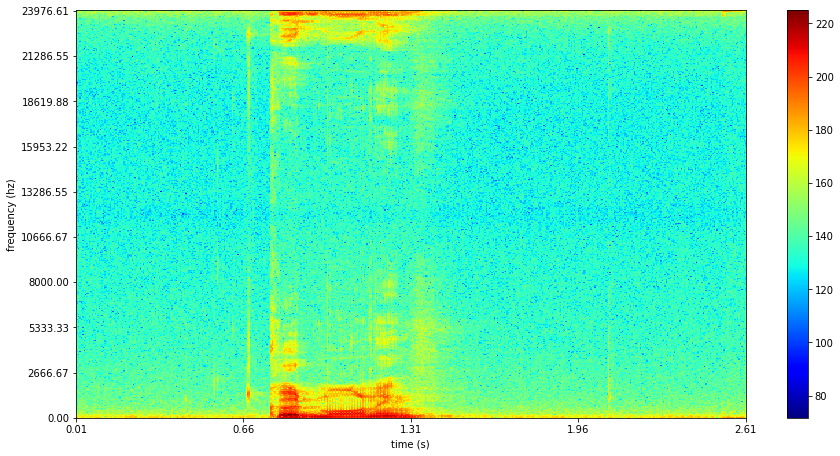

/content/good-morning.wav


<Figure size 432x288 with 0 Axes>

In [24]:
print("Calling spectogram function on original file")

ims = spectogram(path)
print(path)

Calling spectogram function on encrypted file
timebins:  489
freqbins:  513


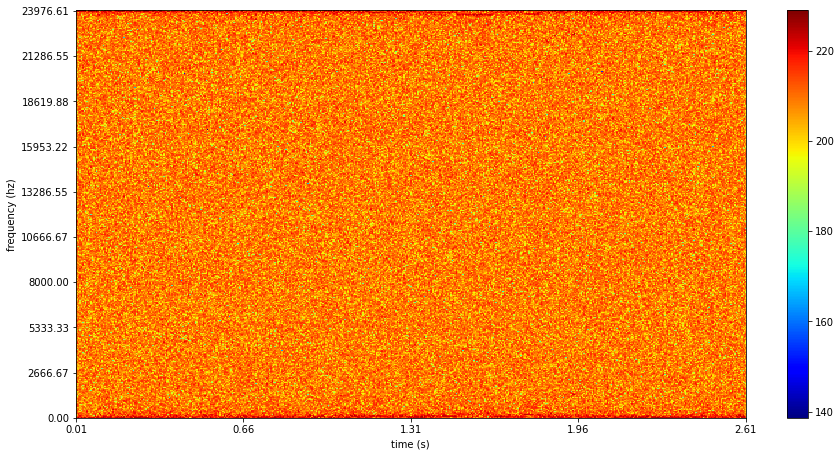

encrypted-good-morning.wav


<Figure size 432x288 with 0 Axes>

In [25]:
print("Calling spectogram function on encrypted file")
ims=spectogram('/content/'+'encrypted-'+inputfilename)
print('encrypted-'+inputfilename)

Calling spectogram function on decrypted file
timebins:  489
freqbins:  513


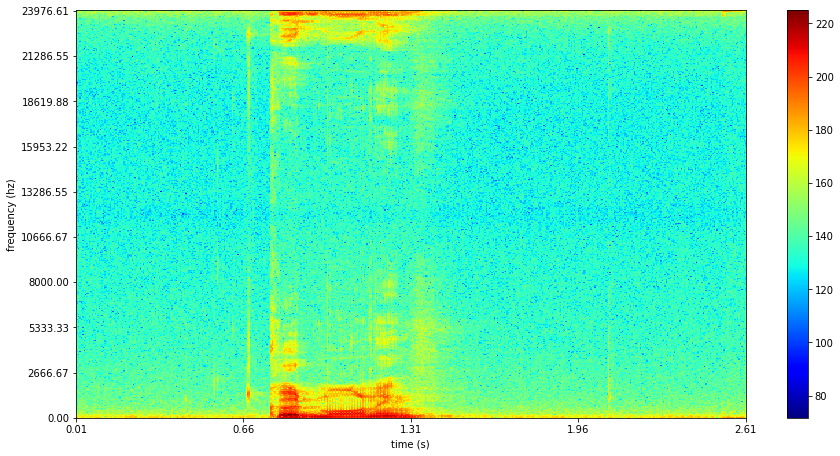

decrypted-good-morning.wav


<Figure size 432x288 with 0 Axes>

In [26]:
print("Calling spectogram function on decrypted file")
ims=spectogram('/content/'+'decrypted-'+inputfilename)
print('decrypted-'+inputfilename)

### STEP 8: Plotting Amplitude wave form

good-morning.wav


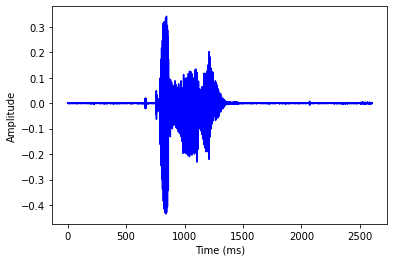




encrypted-good-morning.wav


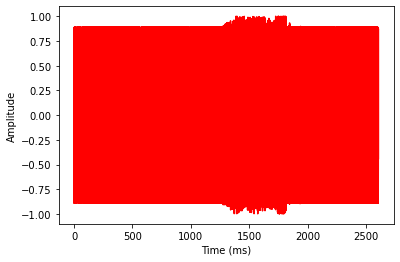




decrypted-good-morning.wav


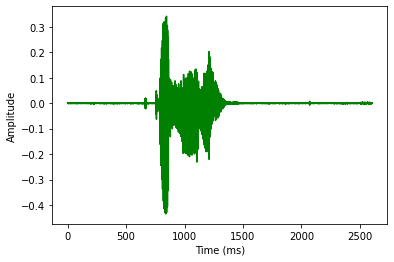

In [27]:
#To get Spectogram wave form

#import numpy
#import matplotlib.pyplot as plt
#import pylab
#from scipy.io import wavfile
#from scipy.fftpack import fft
print(inputfilename)
myAudio = path
samplingFreq, mySound = wavfile.read(myAudio)
mySoundDataType = mySound.dtype
mySound = mySound / (2.**15)
mySoundShape = mySound.shape
samplePoints = float(mySound.shape[0])
signalDuration =  mySound.shape[0] / samplingFreq
mySoundOneChannel = mySound[:,0]
timeArray = numpy.arange(0, samplePoints, 1)
timeArray = timeArray / samplingFreq
timeArray = timeArray * 1000
plt.plot(timeArray, mySoundOneChannel, color='b')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()



print('\n\n\n'+'encrypted-'+inputfilename)
myAudio = '/content/'+'encrypted-'+inputfilename
samplingFreq, mySound = wavfile.read(myAudio)
mySoundDataType = mySound.dtype
mySound = mySound / (2.**15)
mySoundShape = mySound.shape
samplePoints = float(mySound.shape[0])
signalDuration =  mySound.shape[0] / samplingFreq
mySoundOneChannel = mySound[:,0]
timeArray = numpy.arange(0, samplePoints, 1)
timeArray = timeArray / samplingFreq
timeArray = timeArray * 1000
plt.plot(timeArray, mySoundOneChannel, color='r')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()

print('\n\n\n'+'decrypted-'+inputfilename)
myAudio = '/content/'+'decrypted-'+inputfilename
samplingFreq, mySound = wavfile.read(myAudio)
mySoundDataType = mySound.dtype
mySound = mySound / (2.**15)
mySoundShape = mySound.shape
samplePoints = float(mySound.shape[0])
signalDuration =  mySound.shape[0] / samplingFreq
mySoundOneChannel = mySound[:,0]
timeArray = numpy.arange(0, samplePoints, 1)
timeArray = timeArray / samplingFreq
timeArray = timeArray * 1000
plt.plot(timeArray, mySoundOneChannel, color='g')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()



### STEP 9: Plotting Correlation graph 

In [28]:
print("CORRELATION BETWEEN ORIGINAL AUDIO AND ENCRYPTED AUDIO")

df = pd.DataFrame(list(zip(intframe, xor_result)),columns =['original', 'encrypted'])
df 

CORRELATION BETWEEN ORIGINAL AUDIO AND ENCRYPTED AUDIO


,original,encrypted
0,4261411839,3217519592
1,4177524991,4245297562
2,4160746495,3059752529
3,4177524479,4245297140
4,4160747007,4149652127
...,...,...
124987,939538944,939625378
124988,956316928,957316938
124989,1023427072,1034493380
124990,1056981504,966723255


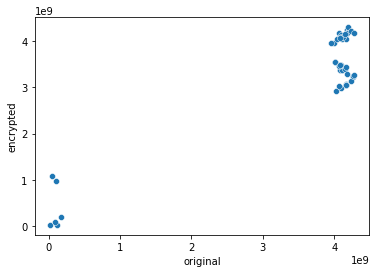

In [29]:
sns.scatterplot(data=df[:50], x="original", y="encrypted")

Text(0, 0.5, 'Encrypted audio')

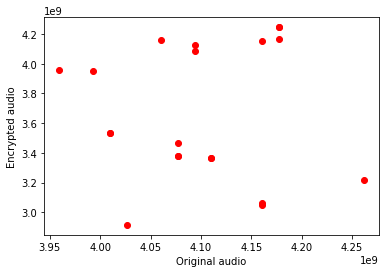

In [30]:
plt.scatter( intframe[:20], xor_result[:20],color='r')

plt.xlabel("Original audio")   
plt.ylabel("Encrypted audio")

In [32]:
dfdec = pd.DataFrame(list(zip(intframe, orig)),columns =['original', 'decrypted'])
dfdec

,original,decrypted
0,4261411839,4261411839
1,4177524991,4177524991
2,4160746495,4160746495
3,4177524479,4177524479
4,4160747007,4160747007
...,...,...
124987,939538944,939538944
124988,956316928,956316928
124989,1023427072,1023427072
124990,1056981504,1056981504


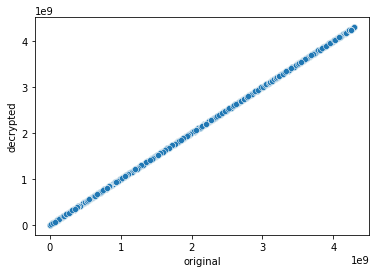

In [33]:
sns.scatterplot(data=dfdec, x="original", y="decrypted")

Text(0.5, 0, 'Original audio')

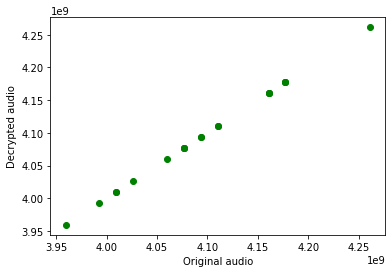

In [34]:
plt.scatter(intframe[:20], orig[:20] ,color='g')
plt.ylabel("Decrypted audio")
plt.xlabel("Original audio")